# PARTIE II: EXPLORATION Ford GoBike 

## PAR: Ngan Desire


## Resume de l'enquete
Notre enquete a porté sur le comportement des membres des courses à velo suivant le 
genre(homme,femme,autre).L'attribut d'interet principal s'est porté sur **member_gender** pour comprendre les
habitudes de consommation des differents genres.Pour ce faire apres le nettoyage nous nous sommes appuye sur les
attributs suivants:**duration_sec,la distance_travel,bike_id,user_type,age_member,start_time_weekdays,
start_time_hour et enfin bike_share_for_all_trip**. 
A l'issue de l'analyse exploratoire nous avons tiré quelques conclusions importantes que nous allons explorer en détails dans la présentatin suivantes:
- Les hommes participent le plus aux courses que les autres genres(femmes,autres)
- Les week-ends(samedi,dimanche) sont les journées ou les trois genres participent le moins aux courses et le jeudi est la journée ou le taux de participation est la plus elevé.
- Quelque soit le genre l'age minimum de participation a la course est de 18 ans et maximum 60 ans
## Resume du jeu de donnée Ford GoBike
 Le jeu de données **Ford GoBike** est constitué de 183412 échantillions(lignes) et de 16 colonnes.les colonnes sont 
 constituées des noms de colonnes suivants:
 **duration_sec,start_time,end_time,start_station_id,start_station_name , 
start_station_latitude,start_station_longitude,bike_id,user_type,member_birth_year,
member_gender,bike_share_for_all_trip**.

In [1]:
# Chargement des librairies principales pour les investigations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
#Suppresion des notes d'erreur pour dans le dossier final
import warnings
warnings.simplefilter("ignore")

In [2]:
#Lecture des données dans une dataframe df_master
df_master=pd.read_csv('Ford_GoBike_master.csv',sep=',')

**Les membres sont composés des hommes,des femmes,et des autres.Les hommes sont les plus reprséntes avec (74,6%)**

''

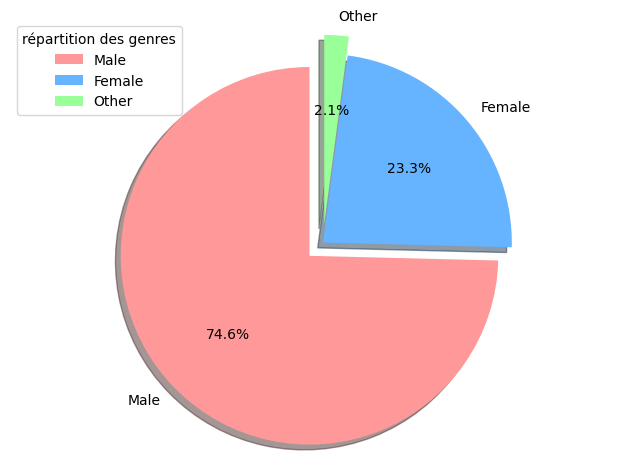

In [3]:
labels=['Male','Female','Other']
sizes=[130330,40719,3642]
#Définition des différentes couleurs
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
#Exploxer le diagramme en camembert
explode = (0.1,0,0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.legend(title='répartition des genres')
;

**Le jour de compétition le plus prisés par les membres(tous genre confondu) est le Jeudi.Les week-ends par contre 
sont les moins fréquentés(samedi,dimanche).Il n'ya pas de compétition le mardi.**

''

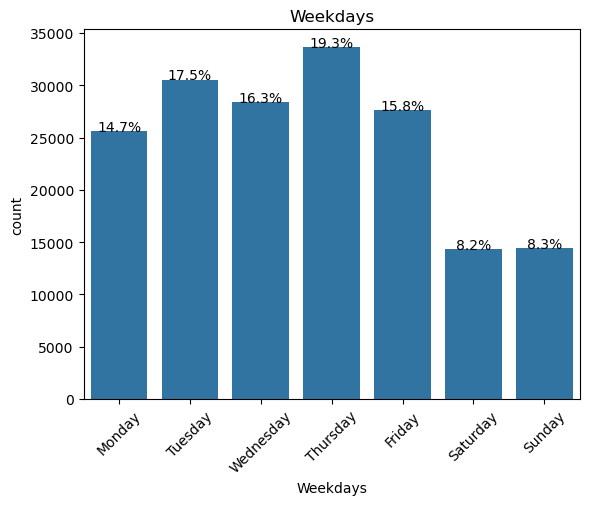

In [4]:
#Définition d'une couleur uniforme pour chaque barre
color_master=sn.color_palette()[0]
#Ordre des jours de la semaine
weekdays_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
#Création du diagramme a barre avec la fonction countplot de seaborn
sn.countplot(data=df_master,x='start_time_weekday',color=color_master,order=weekdays_order)
# Compter la fréquence des valeurs uniques dans la colonne start_time_weekdays du dataframe df_master.
# Par défaut, renvoie l'ordre décroissant de la fréquence.
days_counts = df_master['start_time_weekday'].value_counts()
# Retourner la somme de toutes les valeurs non nulles de la colonne « type »
n_days= df_master['start_time_weekday'].value_counts().sum()
#Recalculer le type de count pour plus de clarté
days_count=df_master['start_time_weekday'].value_counts()
# Obtenir les emplacements et les étiquettes des ticks actuels
locs, labels = plt.xticks(rotation=90)
#Boucler sur chaque paire d'emplacements et d'étiquettes
for loc, label in zip(locs, labels):
 # récupérer la propriété texte de l'étiquette pour obtenir le compte correct
    count = days_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_days)
 #imprimer l'annotation juste en dessous du haut de la barre
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')
    plt.xlabel('Weekdays')
    plt.title('Weekdays')
    plt.xticks(rotation=45)
;

**La grande majorité des membres ont un age compris entre 20 et 70 ans tous genre confondu.Il est aussi à remarqué une grande partie des participants ont moins de 40 ans.Les membres sont essentiellements composés des jeunes.**

''

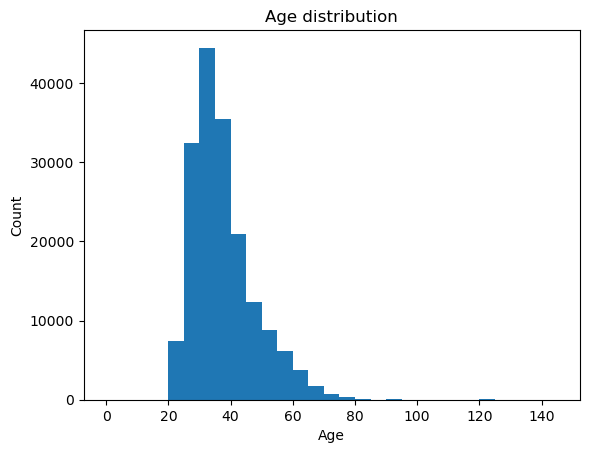

In [5]:
#Répartition des ages des membres
bins = np.arange(0, df_master['age_member'].max()+5, 5)
plt.hist(data =df_master, x = 'age_member', bins = bins)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution')
;

**La grande majorité des genres est représenté le jeudi et les hommes sont les plus nombreux a chacun de ces jours.En revanche on peut remarquer que les memebres appartenant au genre (autre) particpent de facon contante a chacune des courses.Chacun des genres particpent de la meme maniere les samedis et les dimanches.**

''

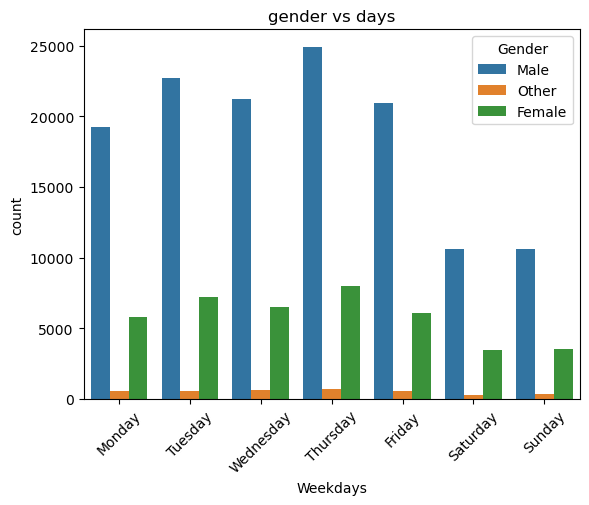

In [6]:
#Tracé du diagramme en barre des journeés de course et du genre
#On va utiliser pour cela la fonction countplot de seaborn
#On definie les différentes catégories
weekdays_classes=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
#On converti la liste gender_classes en categorie avec la fonction astype
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=weekdays_classes)
#On converti la colonne member_gender en catégorie class
df_master['start_time_weekday'] = df_master['start_time_weekday'].astype(vclasses)
sn.countplot(data =df_master, x = 'start_time_weekday', hue = 'member_gender')
plt.xticks(rotation=45)
plt.xlabel('Weekdays')
plt.title('gender vs days')
plt.legend(title='Gender')
;

**On constate qu'il y'a moins de consommateur chez les hommes que les femmes et autre,en revanche ils ont plus de consommateurs que les autres genres repertoriés.**

''

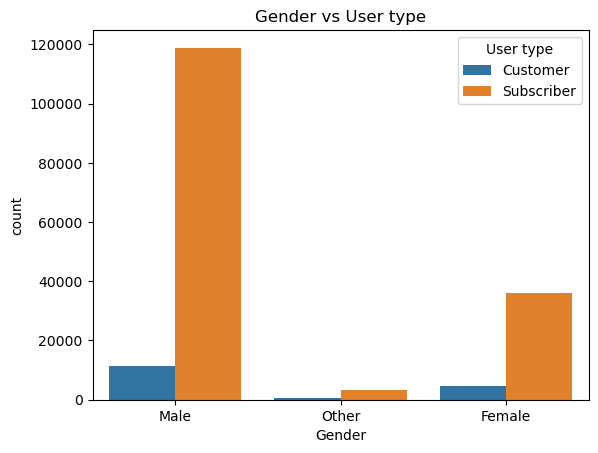

In [7]:
#Tracé du diagramme en barre en fonction du type de consommateur
#On va utiliser pour cela la fonction countplot de seaborn
#Création d'un objet figure
sn.countplot(data =df_master, x = 'member_gender', hue = 'user_type') 
plt.legend(title='User type')
plt.xlabel('Gender')
plt.title('Gender vs User type')
;

**On remarque qu'en considérant la durée des courses par semaine en moyenne les membres avec un autre genre durent beaucoup plus longtemps que les hommes et les femmes**

''

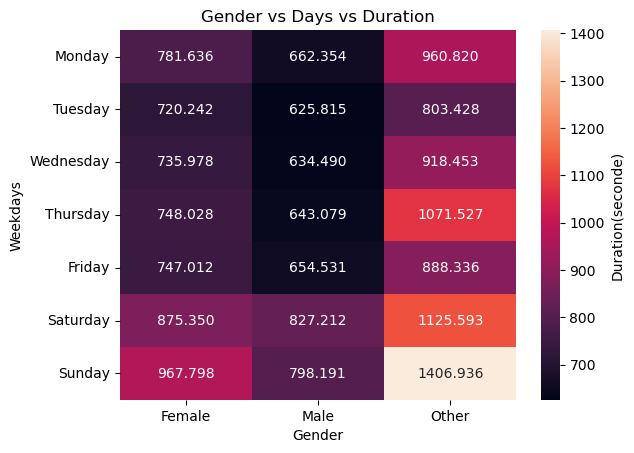

In [8]:
#Encodage par la couleur du genre,les jours de la semaine et la durée du parcours
#Utilisation de heatmap de seaborn
cat_means = df_master.groupby(['member_gender','start_time_weekday']).mean()['duration_sec']
cat_means = cat_means.reset_index(name = 'duration_sec_avg')
cat_means = cat_means.pivot(index = 'start_time_weekday', columns = 'member_gender',
values = 'duration_sec_avg')
sn.heatmap(cat_means, annot = True, fmt = '.3f',
cbar_kws = {'label' : 'Duration(seconde)'})
plt.title('Gender vs Days vs Duration')
plt.xlabel('Gender')
plt.ylabel('Weekdays')
;

In [ ]:
!jupyter nbconvert Partie_II_Exploration_Ford_GoBike.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Partie_II_Exploration_Ford_GoBike.ipynb to slides
[NbConvertApp] Writing 836289 bytes to Partie_II_Exploration_Ford_GoBike.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Partie_II_Exploration_Ford_GoBike.slides.html
Use Control-C to stop this server
